# Seaborn

Nella scorsa lezione abbiamo visto tre metodi di alto livello per creare visualizzazioni con Seaborn.

Tutte le visualizzazioni aggregate in quei tre metodi sono disponibili anche singolarmente offrendo più possibilità di personalizzazione, per questo si consiglia di visualizzare il manuale di Seaborn nel caso serva creare visualizzazioni particolari.

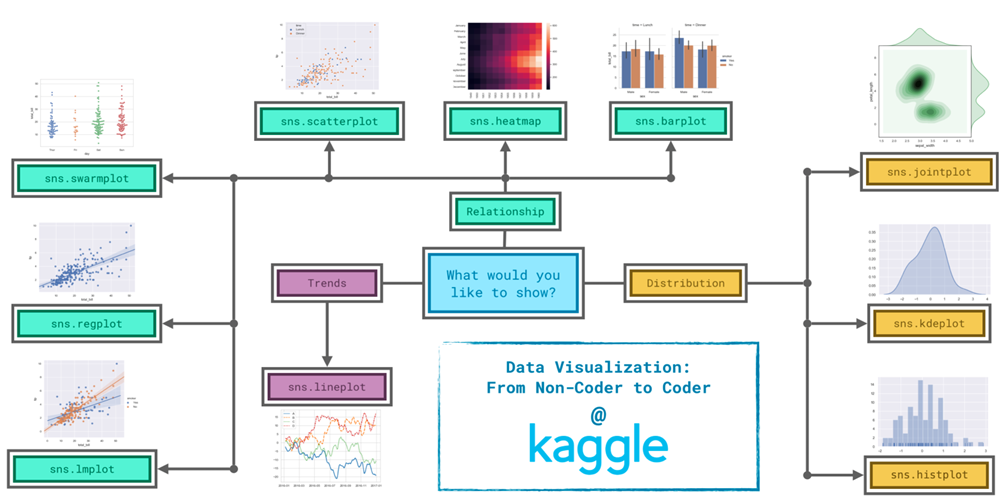

(Immagine presa da: https://www.kaggle.com/code/alexisbcook/choosing-plot-types-and-custom-styles)


## Heatmap
Abbiamo visto in Pandas come simulare una heatmap colorando lo sfondo delle celle di un dataframe, con Seaborn è disponibile un grafico specifico che si può creare tramite il metodo `sns.heatmap(data, vmin=None, vmax=None, center=None, cmap=None, annot=None)`. La documentazione completa è disponibile qui https://seaborn.pydata.org/generated/seaborn.heatmap.html

I parametri principali sono:
*	data: dataframe da cui prelevare i dati per creare la heatmap. Il dataframe deve essere bidimensionale. Come indice bisogna impostare ciò che si vuole vedere sull’asse Y della heatmap, come colonne ciò che si vuole nell’asse X e ogni cella deve contenere un valore numerico.
*	vmin, vmax: valori minimo e massimo da associare alla mappa dei colori, se non specificati vengono presi direttamente dai valori disponibili;
*	center: valore centrale su cui centrare la mappa dei colori.
*	cmap: mappa dei colori da usare, può essere scelta tra quelle disponibili in Matplotlib https://matplotlib.org/stable/users/explain/colors/colormaps.html
*	annot: se impostato a True, viene mostrato il valore all’interno della cella della heatmap.
*	fmt: consente di formattare i valori mostrati nella heatmap. Utilizza i formatter standard di Python disponibili qui https://docs.python.org/3/library/string.html#formatspec



Carichiamo un dataset che fornisce informazioni su tre diverse specie di pinguini.

In [29]:
import seaborn as sns

sns.set_theme()


df = sns.load_dataset('penguins')
display(df.head())
print(df.shape)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(344, 7)


Guardiamo quanti valori nulli ci sono

In [30]:
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Sono molto pochi, li eliminiamo.

In [31]:
df.dropna(inplace=True)

Supponiamo di voler vedere per ogni specie e isola di provenienza il peso medio per sesso.

Creiamo i dati con una pivot table

In [32]:
dati = df.pivot_table(index=['species', 'island'], columns='sex', aggfunc='mean', values=['body_mass_g'])

In [33]:
dati

body_mass_g             
sex                       Female         Male
species   island                             
Adelie    Biscoe     3369.318182  4050.000000
          Dream      3344.444444  4045.535714
          Torgersen  3395.833333  4034.782609
Chinstrap Dream      3527.205882  3938.970588
Gentoo    Biscoe     4679.741379  5484.836066

Visualizziamo i dati in una heatmap

<Axes: xlabel='None-sex', ylabel='species-island'>

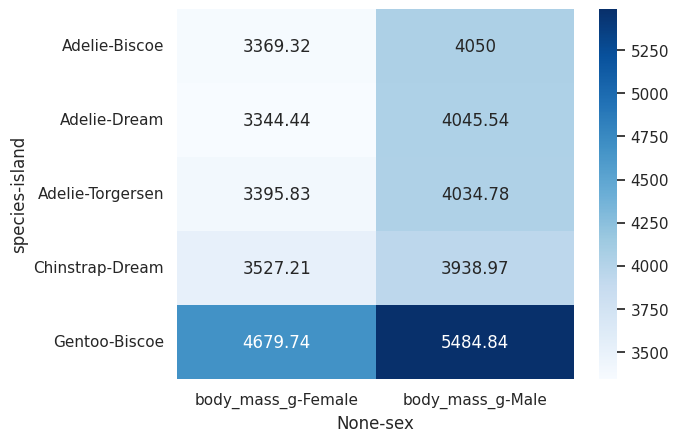

In [34]:
sns.heatmap(dati, annot=True, cmap='Blues', fmt='g')

## Confronto tra tutte le misure di un dataframe

Tramite il metodo `seaborn.pairplot(data, hue=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto')` è possibile creare una visualizzazione per ogni coppia di variabili presenti nel dataframe.  In particolare abbiamo:
*	data: dataframe da cui leggere i dati;
*	hue: eventualmente si può colorare i dati per una colonna;
*	x_vars: elenco di campi da mettere sull’asse x, se omesso userà tutti i campi di tipo numerico;
*	y_vars: elenco di campi da mettere sull’asse x, se omesso userà tutti i campi di tipo numerico;
*	kind: tipo di grafico. Di default utilizza lo scatter plot, si può mettere anche kde per stimare la distribuzione dei valori, hist per visualizzare un’istogramma, reg per visualizzare uno scatter plot con una linea che mostra l’andamento dei dati (regressione, la vedremo nel modulo successivo).
*	diag_kind: tipo di grafico da mostrare sulla diagonale, dove x e y coincidono. Se lasciato ad auto viene scelto il metodo ritenuto più idoneo, altrimenti si può scegliere anche hist, kde oppure None per non creare il grafico.


Di Default il metodo visualizza tutte le coppie di valori numerici.


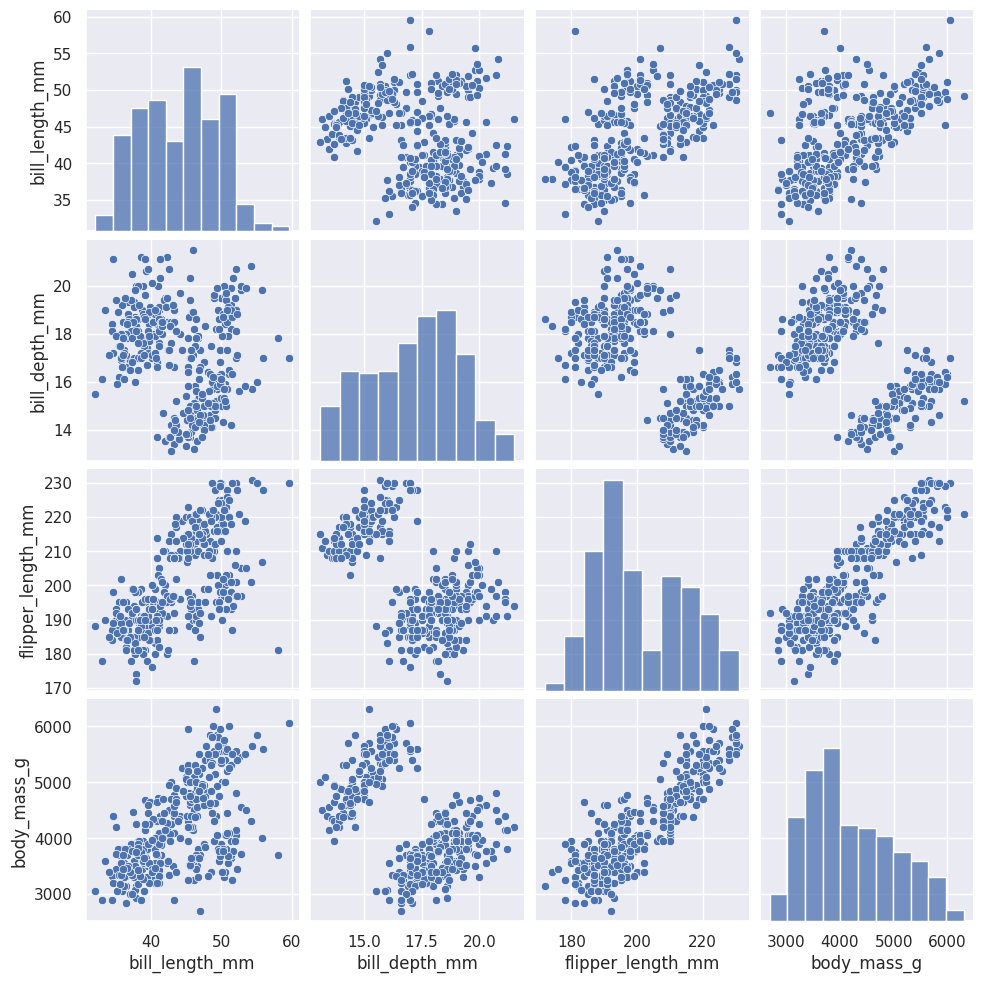

In [35]:
sns.pairplot(df)

Possiamo colorare i punti per la specie.
Come si vede aggiungendo il parametro hue il grafico sulla diagonale viene modificato automaticamente e viene calcolata distribuzione dei valori invece che l’istogramma.

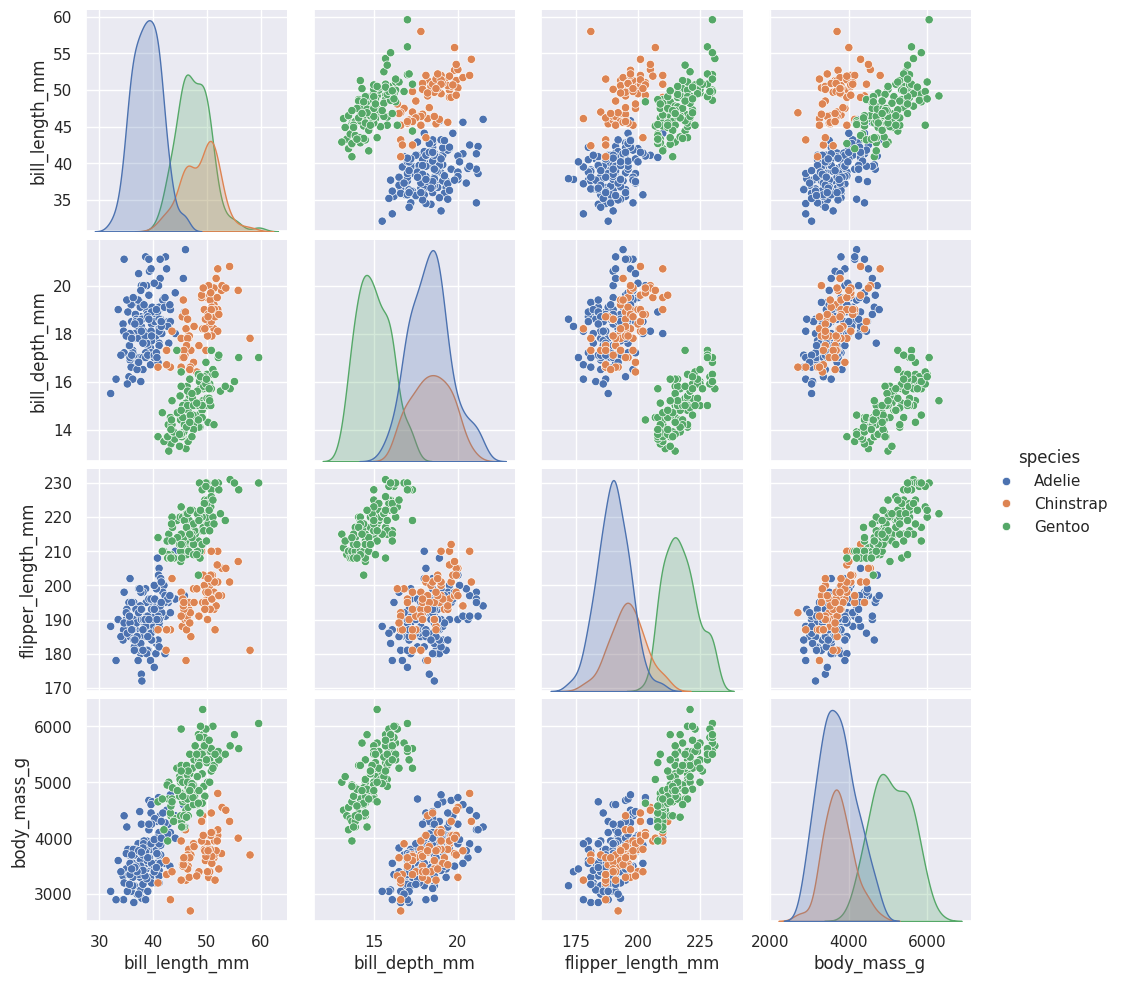

In [36]:
sns.pairplot(df, hue='species')

## Analisi bivariata e univariata in un’unica visualizzazione

Il metodo `seaborn.jointplot(data=None, x=None, y=None, hue=None, kind='scatter')` consente di creare una visualizzazione composta dove viene mostrato no scatter plot nel grafico principale, più due grafici che mostrano la distribuzione delle singole variabili.
*	data: dataframe da cui leggere i dati;
*	x: campo da posizionare sull’asse x;
*	y: campo da posizionare sull’asse y;
*	hue: eventualmente si può colorare i dati per una colonna;
*	kind: tipo di grafico. Di default utilizza lo scatter plot, si può usare anche:
  *	kde: stima la distribuzione dei valori;
  *	hist: mostra un istogramma in stile heatmap;
  *	reg: mostra la distribuzione con una retta che stima l’andamento di uno rispetto all’altro (regressione);


Mettiamo in relazione la lunghezza del becco con il suo spessore.


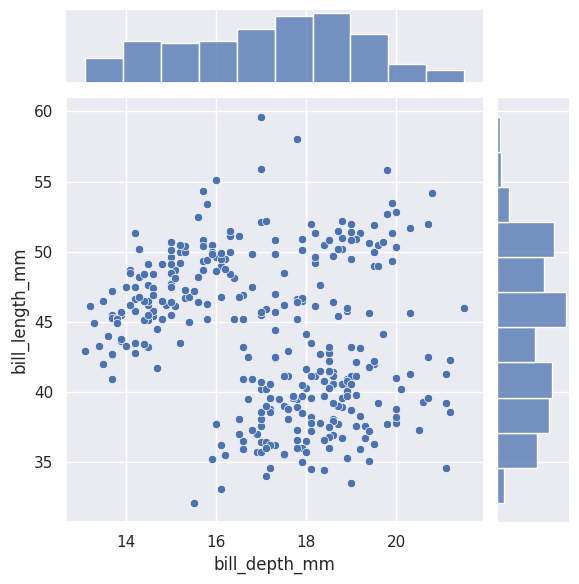

In [37]:
sns.jointplot(data=df, x='bill_depth_mm', y='bill_length_mm')

Possiamo colorare i punti per specie, al posto degli istogrammi viene mostrata la distribuzione stimata della densità dei valoriMM

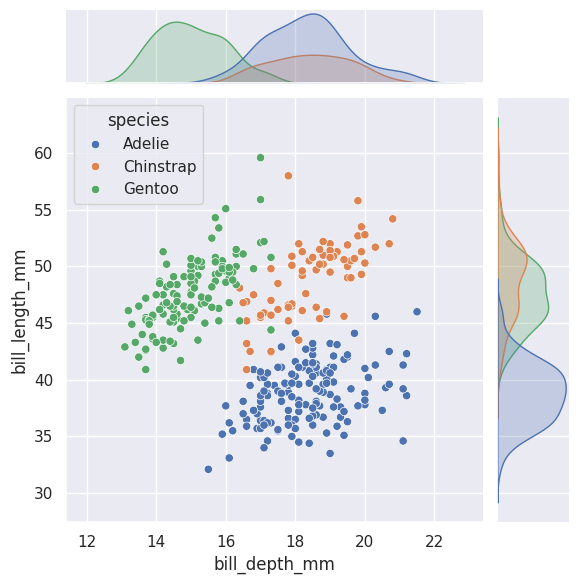

In [39]:
sns.jointplot(data=df, x='bill_depth_mm', y='bill_length_mm', hue='species')

Visualizzazione della distribuzione dei valori tramite densità

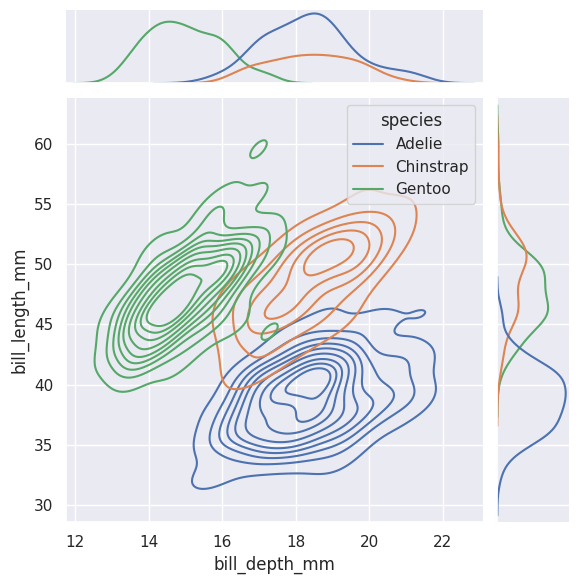

In [40]:
sns.jointplot(data=df, x='bill_depth_mm', y='bill_length_mm', hue='species', kind='kde')

Visualizzazione della distribuzione dei valori tramite istogramma

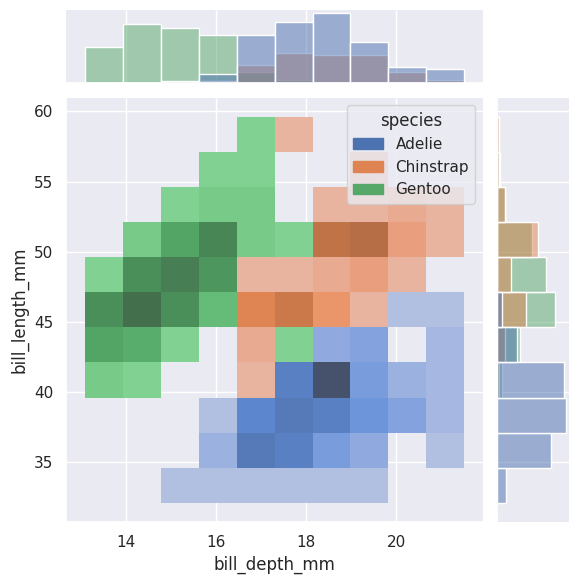

In [41]:
sns.jointplot(data=df, x='bill_depth_mm', y='bill_length_mm', hue='species', kind='hist')

## Conteggio di valori
Il metodo `sns.countplot(data, x=None, stat='count', hue=None)` consente di contare il numero di righe per un determinato valore di x.
*	Data: è il dataframe di input;
*	x: colonna di cui contare i valori;
*	stat: statistica da calcolare:
  *	count: conteggio dei valori;
  *	percent: conteggio dei valori in percentuale;
  *	probability: probabilità di un valore;
*	hue: consente di dividere i valori in base ad un altro.


Ad esempio, possiamo vedere il numero di campioni per specie di pinguino

<Axes: xlabel='species', ylabel='count'>

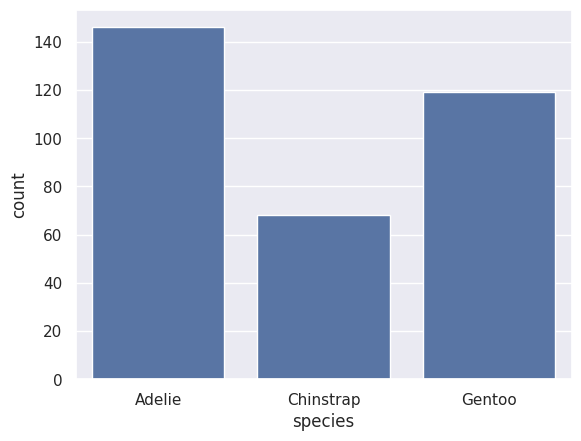

In [42]:
sns.countplot(data=df, x='species')

Oppure il numero di campioni per isola e specie

<Axes: xlabel='island', ylabel='count'>

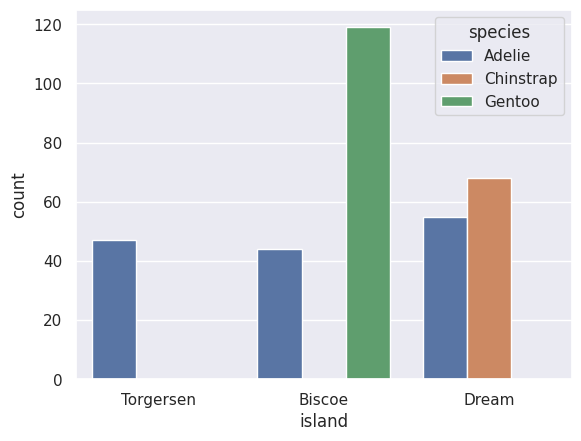

In [43]:
sns.countplot(data=df, x='island', hue='species')